In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

In [2]:
df= pd.read_csv('/Users/sun/Desktop/LST/EDUC 6191/8items.csv')
df = df.drop('student', axis=1)
df.head()

,item1,item2,item3,item4,item5,item6,item7,item8
0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,1,1
3,0,1,0,0,0,0,1,0
4,1,1,0,0,0,1,1,0


KMO: 0.6733197201419855


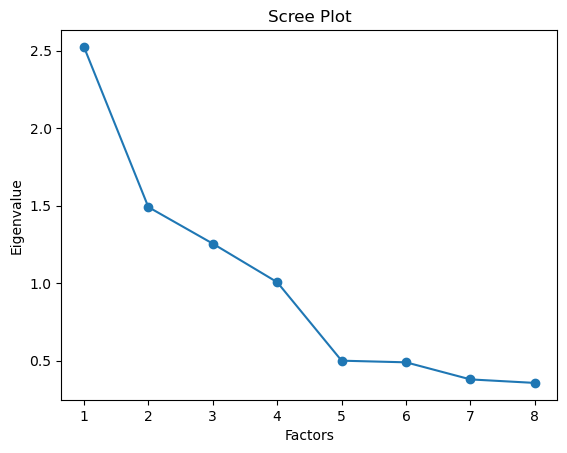

Number of factors (Kaiser criterion): 4


In [3]:
import matplotlib.pyplot as plt
# Calculate the Kaiser-Meyer-Olkin (KMO) measure
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print("KMO:", kmo_model)

# Create a scree plot to visualize the explained variance
def scree_plot(fa, num_factors=None):
    ev, v = fa.get_eigenvalues()
    num_factors = num_factors or len(ev)
    plt.plot(range(1, num_factors + 1), ev[:num_factors], marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.show()

# Determine the number of factors using the scree plot
fa = FactorAnalyzer()
fa.fit(df)
scree_plot(fa)

# Determine the number of factors using the Kaiser criterion (Eigenvalue > 1)
num_factors_kaiser = sum(fa.get_eigenvalues()[0] > 1)
print("Number of factors (Kaiser criterion):", num_factors_kaiser)

In [4]:
# Perform factor analysis
factor_analyzer = FactorAnalyzer(n_factors=num_factors_kaiser, rotation='varimax')
factor_analyzer.fit(df)
# Get factor loadings
factor_loadings = factor_analyzer.loadings_

# Print factor loadings
print("Factor Loadings:")
print(factor_loadings)

Factor Loadings:
[[-8.58144404e-02  4.20405635e-01  2.05260861e-02 -3.06229620e-02]
 [-5.31002958e-02 -3.74467992e-02  9.74348807e-03  6.71622089e-01]
 [ 8.08531930e-01  3.84533721e-02 -6.33296554e-03 -2.88708465e-02]
 [-4.46106812e-03  1.60174038e-02  6.66485558e-01 -2.86807363e-02]
 [ 4.08216281e-01  9.09759225e-01 -2.63070013e-02  6.72978199e-03]
 [ 4.34996606e-03 -1.61501244e-03  5.72489955e-01  5.03763834e-01]
 [ 7.83654420e-01  2.45434333e-02 -1.36719809e-03 -6.27399046e-02]
 [ 7.88069108e-01  3.68890081e-02  4.25503808e-04 -6.34208071e-04]]


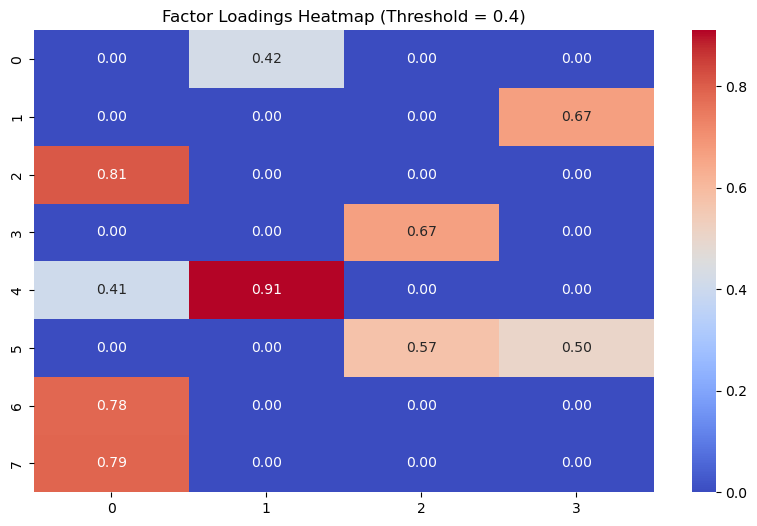

In [5]:
import seaborn as sns

threshold = 0.4
# Apply the threshold to factor loadings
factor_loadings_thresholded = factor_analyzer.loadings_.copy()
factor_loadings_thresholded[abs(factor_loadings_thresholded)  < threshold] = 0
# Create a heatmap to visualize the factor loadings with the current threshold
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_thresholded, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Factor Loadings Heatmap (Threshold = {threshold})")
plt.show()


In [6]:
q_matrix = np.where(np.abs(factor_loadings) < threshold, 0, 1)

# Create a DataFrame to represent the Q-matrix
q_matrix = pd.DataFrame(q_matrix, columns=['Skill 1', 'Skill 2', 'Skill 3', 'Skill 4'], index = df.columns)

# Display the resulting Q-matrix
print("Q-Matrix based on Factor Loading:")
print(q_matrix)


Q-Matrix based on Factor Loading:
       Skill 1  Skill 2  Skill 3  Skill 4
item1        0        1        0        0
item2        0        0        0        1
item3        1        0        0        0
item4        0        0        1        0
item5        1        1        0        0
item6        0        0        1        1
item7        1        0        0        0
item8        1        0        0        0


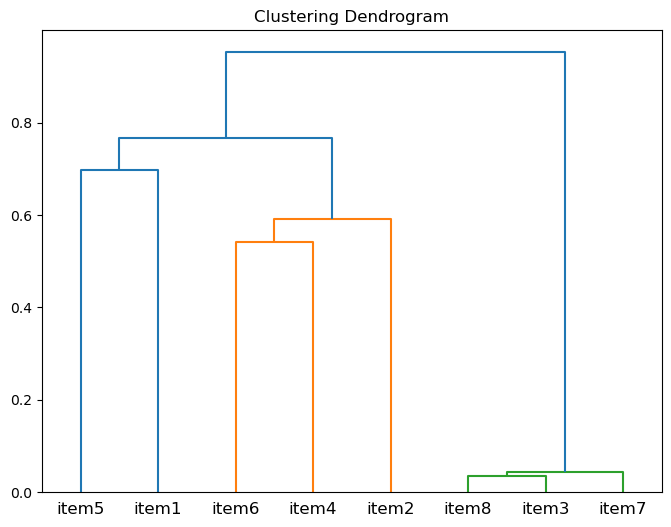

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering
c = linkage(factor_loadings, 'single')

# Plotting the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(c, labels=df.columns, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Clustering Dendrogram')
plt.show()

In [8]:
q_matrix_manual = pd.DataFrame(0, index=['Skill 1', 'Skill 2', 'Skill 3'], columns=df.columns)

# Assign items 1 and 5 to the same skill or cluster
q_matrix_manual.loc['Skill 1', ['item1', 'item5']] = 1

q_matrix_manual.loc['Skill 2', ['item6', 'item4','item2']] = 1

# Assign items 3, 7, and 8 to the same skill or cluster
q_matrix_manual.loc['Skill 3', ['item3', 'item7', 'item8']] = 1

# Display the resulting Q-matrix
print("Q-Matrix based on Dendrogram:")
print(q_matrix_manual)

Q-Matrix based on Dendrogram:
         item1  item2  item3  item4  item5  item6  item7  item8
Skill 1      1      0      0      0      1      0      0      0
Skill 2      0      1      0      1      0      1      0      0
Skill 3      0      0      1      0      0      0      1      1


In [13]:
from pingouin import cronbach_alpha

# Calculate Cronbach's alpha using pingouin
cronbach_alpha_result = cronbach_alpha(df)
print("Cronbach's Alpha (pingouin):", cronbach_alpha_result)

Cronbach's Alpha (pingouin): (0.5324976693382759, array([0.5  , 0.563]))
